### Lab-6 : Self-Practice

In this week self practice, you will apply [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) on multi-class problem. In the following 3-class generated blobs you will train SVCs in a one-vs-one and one-vs-rest approach. Draw the decision bounderies of each approach.

#### Question: Recall what the difference between one-vs-one and on-vs-rest for multiclass classification is. 

In [34]:
from sklearn.datasets import make_blobs 
import matplotlib.pyplot as plt


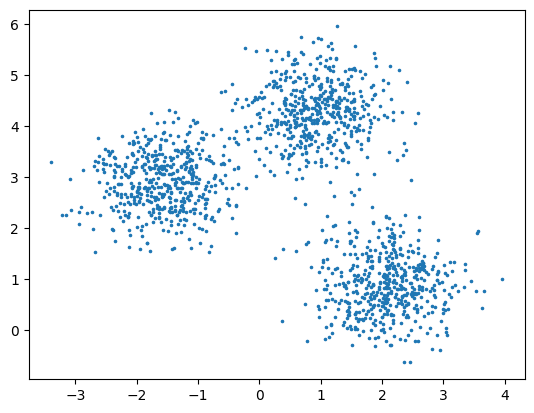

In [35]:
# we create the dataset
X, y = make_blobs(n_samples=1500, centers=3, n_features=2, cluster_std=0.60,
                  random_state=0)

plt.scatter(X[:, 0], X[:, 1],  marker=".", s=10)

### Create a svc model to classify the data point using one-vs-one approach and draw the decision bounderies (hyperplan and margins)

(-3.764761485860799, 4.325595903086404) (-0.9564036257018147, 6.288724396888155)
(-3.764761485860799, 4.325595903086404) (-0.9564036257018147, 6.288724396888155)
(-3.764761485860799, 4.325595903086404) (-0.9564036257018147, 6.288724396888155)


C:\Users\user\AppData\Local\Temp\ipykernel_6672\4018434241.py:20: UserWarning: The following kwargs were not used by contour: 'linewidth'
  ax.contour(X, Y, P, colors = 'y', levels = [-1, 0, 1], alpha = 0.5, linewidth = 1.5, linestyles = ['dashed', 'solid', 'dashed'])
C:\Users\user\AppData\Local\Temp\ipykernel_6672\4018434241.py:20: UserWarning: The following kwargs were not used by contour: 'linewidth'
  ax.contour(X, Y, P, colors = 'y', levels = [-1, 0, 1], alpha = 0.5, linewidth = 1.5, linestyles = ['dashed', 'solid', 'dashed'])
C:\Users\user\AppData\Local\Temp\ipykernel_6672\4018434241.py:20: UserWarning: The following kwargs were not used by contour: 'linewidth'
  ax.contour(X, Y, P, colors = 'y', levels = [-1, 0, 1], alpha = 0.5, linewidth = 1.5, linestyles = ['dashed', 'solid', 'dashed'])


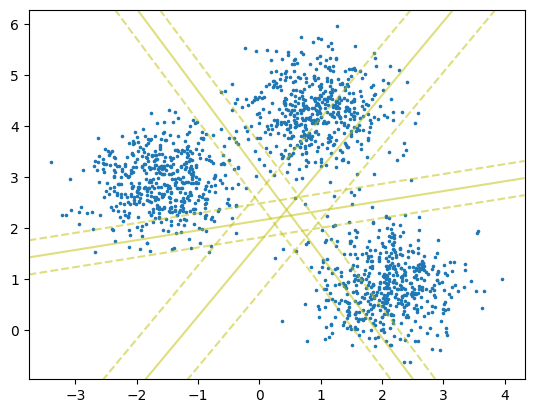

In [36]:
# Your code 
import numpy as np
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier

def draw_line(model):
    ax = plt.gca()
    x_limits = ax.get_xlim()
    y_limits = ax.get_ylim()
    print(x_limits, y_limits)

    x = np.linspace(x_limits[0], x_limits[1], 30)
    y = np.linspace(y_limits[0], y_limits[1], 30)

    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    ax.contour(X, Y, P, colors = 'y', levels = [-1, 0, 1], alpha = 0.5, linewidth = 1.5, linestyles = ['dashed', 'solid', 'dashed'])

    ax.set_xlim(x_limits)
    ax.set_ylim(y_limits)

model = SVC(kernel='linear')

vsone = OneVsOneClassifier(model)
vsone.fit(X, y)
plt.scatter(X[:, 0], X[:, 1],  marker=".", s=10)

for estimator in vsone.estimators_:
    draw_line(estimator)

### Create a svc model to classify the data points using one-vs-rest approach and draw the desicion bounderies

(-3.764761485860799, 4.325595903086404) (-0.9564036257018147, 6.288724396888155)
(-3.764761485860799, 4.325595903086404) (-0.9564036257018147, 6.288724396888155)
(-3.764761485860799, 4.325595903086404) (-0.9564036257018147, 6.288724396888155)


C:\Users\user\AppData\Local\Temp\ipykernel_6672\4018434241.py:20: UserWarning: The following kwargs were not used by contour: 'linewidth'
  ax.contour(X, Y, P, colors = 'y', levels = [-1, 0, 1], alpha = 0.5, linewidth = 1.5, linestyles = ['dashed', 'solid', 'dashed'])
C:\Users\user\AppData\Local\Temp\ipykernel_6672\4018434241.py:20: UserWarning: The following kwargs were not used by contour: 'linewidth'
  ax.contour(X, Y, P, colors = 'y', levels = [-1, 0, 1], alpha = 0.5, linewidth = 1.5, linestyles = ['dashed', 'solid', 'dashed'])
C:\Users\user\AppData\Local\Temp\ipykernel_6672\4018434241.py:20: UserWarning: The following kwargs were not used by contour: 'linewidth'
  ax.contour(X, Y, P, colors = 'y', levels = [-1, 0, 1], alpha = 0.5, linewidth = 1.5, linestyles = ['dashed', 'solid', 'dashed'])


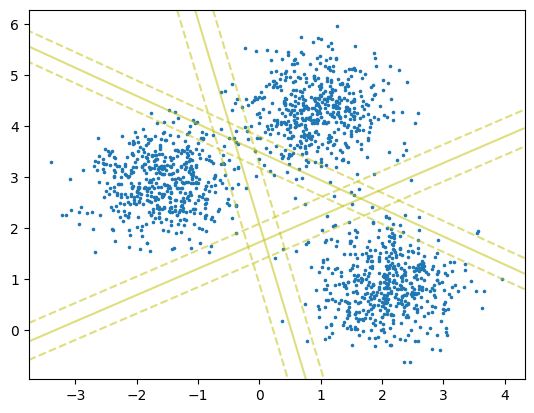

In [37]:
# Your code 
model = SVC(kernel = 'linear')

vsrest = OneVsRestClassifier(model)
vsrest.fit(X, y)

plt.scatter(X[:, 0], X[:, 1],  marker=".", s=10)

for estimator in vsrest.estimators_:
    draw_line(estimator)

### Using 5-fold cross validation compare the accuracies of each method

One vs One accuracy: 0.9973333333333333
One vs Rest accuracy: 0.9960000000000001


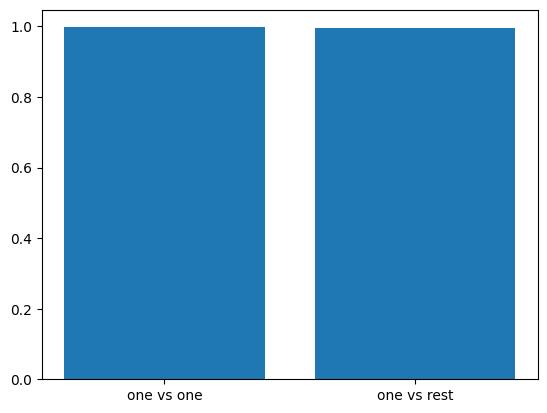

In [38]:
# Your code here
from sklearn.model_selection import cross_val_score

vsone_acc = cross_val_score(vsone, X, y, cv=5, scoring='accuracy')
vsrest_acc = cross_val_score(vsrest, X, y, cv=5, scoring='accuracy')

mean_vsone_acc = np.mean(vsone_acc)
mean_vsrest_acc = np.mean(vsrest_acc)

names = ['one vs one', 'one vs rest']
accs = [mean_vsone_acc, mean_vsrest_acc]

plt.bar(names, accs)
plt.show

print(f"One vs One accuracy: {mean_vsone_acc}")
print(f"One vs Rest accuracy: {mean_vsrest_acc}")